In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data.csv')

In [3]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns 
from kmodes.kmodes import KModes

In [4]:
X = df.drop('Result', axis=1)
label = df['Result']

# KModes

100%|██████████| 9/9 [08:07<00:00, 54.15s/it]


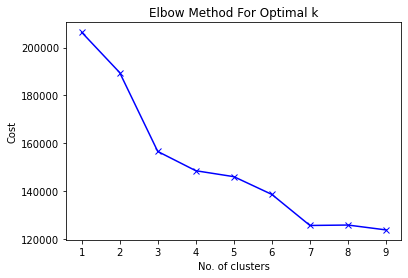

In [5]:
# Elbow curve to find optimal K
from tqdm import tqdm
cost = []
for num_clusters in tqdm(range(1,10)):
    kmode = KModes(n_clusters=num_clusters, init="random", n_init=1, random_state=69)
    kmode.fit_predict(X)
    cost.append(kmode.cost_)
    
plt.plot(range(1,10), cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [6]:
kmode = KModes(n_clusters=2, init="random", n_init=5, random_state=69, n_jobs=-1)
kmode.fit_predict(X)

array([0, 0, 0, ..., 1, 0, 1], dtype=uint16)

In [8]:
cluster_labels = kmode.labels_
unique, counts = np.unique(cluster_labels, return_counts=True)
dict(zip(unique, counts))

{0: 13338, 1: 15994}

In [9]:
pca = PCA(2) 
pca_data = pd.DataFrame(pca.fit_transform(X),columns=['PC1','PC2']) 

In [10]:
pca_data['cluster'] = pd.Categorical(kmode.labels_)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

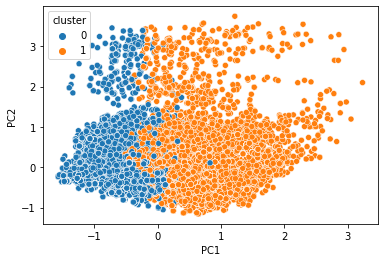

In [11]:
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)

In [12]:
cluster_vs_label_df = pd.DataFrame({'cluster':cluster_labels, 'label':label})
cluster_vs_label_df.head()

,cluster,label
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [15]:
X.head()

,android.permission.GET_ACCOUNTS,com.sonyericsson.home.permission.BROADCAST_BADGE,android.permission.READ_PROFILE,android.permission.MANAGE_ACCOUNTS,android.permission.WRITE_SYNC_SETTINGS,android.permission.READ_EXTERNAL_STORAGE,android.permission.RECEIVE_SMS,com.android.launcher.permission.READ_SETTINGS,android.permission.WRITE_SETTINGS,com.google.android.providers.gsf.permission.READ_GSERVICES,...,android.permission.CLEAR_APP_CACHE,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.sec.android.iap.permission.BILLING,com.htc.launcher.permission.UPDATE_SHORTCUT,com.sec.android.provider.badge.permission.WRITE,android.permission.ACCESS_NETWORK_STATE,com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE,com.huawei.android.launcher.permission.READ_SETTINGS,android.permission.READ_SMS,android.permission.PROCESS_INCOMING_CALLS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [17]:
full_df = pd.concat([X, cluster_vs_label_df], axis=1)
full_df.head()

,android.permission.GET_ACCOUNTS,com.sonyericsson.home.permission.BROADCAST_BADGE,android.permission.READ_PROFILE,android.permission.MANAGE_ACCOUNTS,android.permission.WRITE_SYNC_SETTINGS,android.permission.READ_EXTERNAL_STORAGE,android.permission.RECEIVE_SMS,com.android.launcher.permission.READ_SETTINGS,android.permission.WRITE_SETTINGS,com.google.android.providers.gsf.permission.READ_GSERVICES,...,com.sec.android.iap.permission.BILLING,com.htc.launcher.permission.UPDATE_SHORTCUT,com.sec.android.provider.badge.permission.WRITE,android.permission.ACCESS_NETWORK_STATE,com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE,com.huawei.android.launcher.permission.READ_SETTINGS,android.permission.READ_SMS,android.permission.PROCESS_INCOMING_CALLS,cluster,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [23]:
print("Percent separated: {}".format(100-(len(full_df[full_df['cluster']!=full_df['label']])/len(X))*100))

Percent separated: 73.08741306423019
